# Conform to Savva's folds

In [1]:
# import importlib
# import processing_utils; importlib.reload(processing_utils)
from processing_utils import *

Seed: 7961730
Vocab size: 69


In [2]:
train_df = pd.read_csv("../data/cft-train.zip")
print(train_df.shape)

test_df = pd.read_csv("../data/cft-test.zip")
print(test_df.shape)

(1991104, 5)
(2767639, 3)


In [3]:
cns = train_df.country.value_counts()
top_countries = list(cns[cns>100].index)
        
train_df['country'] = train_df['country'].apply(lambda x: x if x in top_countries else 'OTHER')
test_df['country'] = test_df['country'].apply(lambda x: x if x in top_countries else 'OTHER')

cn_dict = dict(zip(sorted(list(train_df['country'].unique())),
                   range(train_df['country'].nunique())))

train_df['country'] = train_df['country'].apply(lambda x: cn_dict[x])
test_df['country'] = test_df['country'].apply(lambda x: cn_dict[x])

In [4]:
train_df.loc[train_df["id"] == 286958, "fullname"] = "Ш Р"
train_df.fullname = train_df.fullname.astype(str).apply(cleaner)
test_df.fullname = test_df.fullname.astype(str).apply(cleaner)

In [5]:
train_df.loc[train_df.target != 1, "fullname_true"] = train_df.loc[train_df.target != 1, "fullname"]

train_df.head()

,id,fullname,country,target,fullname_true
0,0,AKHMEDOV YGURIY,44,1,AKHMEDOV YURIY
1,1,ФОЗИЛОВ РАМИЛЬ ГУЛЛОВИЧ,44,1,ФОЗИЛОВ РАМИЛЬ ГУЛОВИЧ
2,2,ГОИБОВ АХЛИДДИН ШАМСУДИНОВИЧ,44,0,ГОИБОВ АХЛИДДИН ШАМСУДИНОВИЧ
3,3,ХУСНЕУТДИНОВА МАРГАРИТА ФАХИМОВНА,44,1,ХУСНУТДИНОВА МАРГАРИТА ФАХИМОВНА
4,4,НОВОКШОНОВА ИННА ВЛАДИМИРОВНА,44,0,НОВОКШОНОВА ИННА ВЛАДИМИРОВНА


In [6]:
test_df['fullname_true'] = test_df['fullname']
test_df['target'] = 0

In [7]:
trn_ids, val_ids = train_test_split(train_df.id.values, stratify=train_df.target.values, test_size=0.1, random_state=seed)
print("train_size: {}, valid_size: {}".format(len(trn_ids), len(val_ids)))

train_size: 1791993, valid_size: 199111


In [8]:
trn_df = train_df[train_df["id"].isin(set(trn_ids))].reset_index(drop=True)
print(trn_df.shape)

val_df = train_df[train_df["id"].isin(set(val_ids))].reset_index(drop=True)
print(val_df.shape)

(1791993, 5)
(199111, 5)


In [10]:
train_df.head()

,id,fullname,country,target,fullname_true
0,0,AKHMEDOV YGURIY,44,1,AKHMEDOV YURIY
1,1,ФОЗИЛОВ РАМИЛЬ ГУЛЛОВИЧ,44,1,ФОЗИЛОВ РАМИЛЬ ГУЛОВИЧ
2,2,ГОИБОВ АХЛИДДИН ШАМСУДИНОВИЧ,44,0,ГОИБОВ АХЛИДДИН ШАМСУДИНОВИЧ
3,3,ХУСНЕУТДИНОВА МАРГАРИТА ФАХИМОВНА,44,1,ХУСНУТДИНОВА МАРГАРИТА ФАХИМОВНА
4,4,НОВОКШОНОВА ИННА ВЛАДИМИРОВНА,44,0,НОВОКШОНОВА ИННА ВЛАДИМИРОВНА


In [11]:
cols = ['id','fullname','fullname_true','target','country']
train_df = train_df[cols].set_index('id')
test_df = test_df[cols].set_index('id')
trn_df = trn_df[cols].set_index('id')
val_df = val_df[cols].set_index('id')

In [12]:
train_df = train_df.to_csv('../data/proc_train.csv')
test_df = test_df.to_csv('../data/proc_test.csv')
trn_df = trn_df.to_csv('../data/proc_trn.csv')
val_df = val_df.to_csv('../data/proc_val.csv')

In [19]:
trn_df = pd.read_csv('../data/proc_train.csv')

In [20]:
trn_df

,id,fullname,fullname_true,target,country
0,0,AKHMEDOV YGURIY,AKHMEDOV YURIY,1,44
1,1,ФОЗИЛОВ РАМИЛЬ ГУЛЛОВИЧ,ФОЗИЛОВ РАМИЛЬ ГУЛОВИЧ,1,44
2,2,ГОИБОВ АХЛИДДИН ШАМСУДИНОВИЧ,ГОИБОВ АХЛИДДИН ШАМСУДИНОВИЧ,0,44
3,3,ХУСНЕУТДИНОВА МАРГАРИТА ФАХИМОВНА,ХУСНУТДИНОВА МАРГАРИТА ФАХИМОВНА,1,44
4,4,НОВОКШОНОВА ИННА ВЛАДИМИРОВНА,НОВОКШОНОВА ИННА ВЛАДИМИРОВНА,0,44
5,5,МЕДЕТБЕК КЫЗЫ МАПАБАТ,МЕДЕТБЕК КЫЗЫ МАХАБАТ,1,34
6,6,ЖУМАЕВ ОРИФ ХОЛМАТОВИЧ,ЖУМАЕВ ОРИФ ХОЛМАТОВИЧ,0,44
7,7,ТИРКАШЕПВ МАШРАБ УСМОНОВИЧ,ТИРКАШЕВ МАШРАБ УСМОНОВИЧ,1,44
8,8,НАЛТАКЯН ГАМЬЛЕТ АЛЬБЕРТОВИЧ,НАЛТАКЯН ГАМЛЕТ АЛЬБЕРТОВИЧ,1,13
9,9,ГНИГОРЯН АННА ЛЕОНИДОВНА,ГРИГОРЯН АННА ЛЕОНИДОВНА,1,44


In [13]:
!ls -laht ../data/ | head

total 1.2G
-rw-r--r-- 1 keras users  21M Oct 26 03:57 proc_val.csv
drwxr-xr-x 3 keras users 4.0K Oct 26 03:57 .
-rw-r--r-- 1 keras users 186M Oct 26 03:57 proc_trn.csv
-rw-r--r-- 1 keras users 289M Oct 26 03:57 proc_test.csv
-rw-r--r-- 1 keras users 207M Oct 26 03:56 proc_train.csv
-rw-r--r-- 1 keras users   16 Oct 19 07:27 train_data.pickle
drwxr-xr-x 6 keras users 4.0K Oct  8 17:56 ..
-rw-rw-r-- 1 keras  1000   71 Oct  8 17:55 .gitignore
drwxr-xr-x 2 keras users 4.0K Oct  8 17:29 .ipynb_checkpoints


# Check that vocabularies are uniform across runs

In [1]:
from torchtext import data, datasets
from pytorch.encoder_decoder_utils import tokenize                                           

In [5]:
UNK_TOKEN = "!"
PAD_TOKEN = "_"    
SOS_TOKEN = "["
EOS_TOKEN = "]"
LOWER = False

ID = data.Field(sequential=False,
                use_vocab=False)

NAMES = data.Field(tokenize=tokenize,
                   batch_first=True,
                   lower=LOWER,
                   include_lengths=True,
                   unk_token=UNK_TOKEN,
                   pad_token=PAD_TOKEN,
                   init_token=None,
                   eos_token=EOS_TOKEN)

TRG_NAMES = data.Field(tokenize=tokenize, 
                       batch_first=True,
                       lower=LOWER,
                       include_lengths=True,
                       unk_token=UNK_TOKEN,
                       pad_token=PAD_TOKEN,
                       init_token=SOS_TOKEN,
                       eos_token=EOS_TOKEN)

LBL = data.Field(sequential=False,
                 use_vocab=False)

CNT = data.Field(sequential=False,
                 use_vocab=False)

datafields = [("id", ID),
              ("src", NAMES),
              ("trg", TRG_NAMES),
              ("clf", LBL),
              ("cn", CNT)
             ]

trainval_data = data.TabularDataset(path='../data/proc_train.csv',
                                 format='csv',
                                 skip_header=True,
                                 fields=datafields)    

NAMES.build_vocab(trainval_data.src, min_freq=0)
TRG_NAMES.build_vocab(trainval_data.trg, min_freq=0)
PAD_INDEX = TRG_NAMES.vocab.stoi[PAD_TOKEN]

In [4]:
dct = NAMES.vocab.stoi

In [6]:
dct2 = NAMES.vocab.stoi

In [7]:
dct == dct2

True

# Augment data

In [1]:
import pickle 
import numpy as np
import pandas as pd
from tqdm import tqdm
from multiprocessing import Pool
from generate_mistakes import generate_mistakes

with open('nearest_dict_dx', 'rb') as f:
    nearest_dict = pickle.load(f)
    
def list_multiprocessing(param_lst,
                         func,
                         **kwargs):
    
    workers = kwargs.pop('workers')

    with Pool(workers) as p:
        apply_lst = [([params], func, i, kwargs) for i,params in enumerate(param_lst)]
        result = list(tqdm(p.imap(_apply_lst, apply_lst), total=len(apply_lst)))

    # lists do not need such sorting, but this can be useful later
    result=sorted(result,key=lambda x:x[0])
    return [_[1] for _ in result]

def _apply_lst(args):
    params, func, num, kwargs = args
    return num, func(*params,**kwargs)

def generate_mistakes_wrapper(name):
    global nearest_dict
    try:
        return generate_mistakes(name,nearest_dict)
    except:
        return name    

In [ ]:
trn_df = pd.read_csv('../data/proc_trn.csv')    
trn_df_copy = trn_df.copy()
names = list(trn_df_copy.fullname_true.values)
aug_names = list_multiprocessing(names,generate_mistakes_wrapper, workers=4)

In [6]:
%time 
generate_mistakes('ФОЗИЛОВ РАМИЛЬ ГУЛЛОВИЧ', nearest_dict)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 4.77 µs


'ФОЗИЛОВ АРМИЛЬ ГУЛЛОВИЧ'

In [2]:
trn_df = pd.read_csv('../data/proc_trn.csv')

In [4]:
trn_df = pd.read_csv('../data/proc_trn.csv')

trn_df_copy = trn_df.copy()
names = list(trn_df_copy.fullname_true.values)

aug_names = list_multiprocessing(names,generate_mistakes_wrapper, workers=8)

trn_df_copy['fullname'] = aug_names
trn_df_copy['id'] = trn_df_copy['id']+10000000



100%|██████████| 1791993/1791993 [11:04<00:00, 2698.08it/s]


NameError: name 'trn_df_copy2' is not defined

In [5]:
trn_df_aug = pd.concat([trn_df,trn_df_copy])
trn_df_aug = trn_df_aug.set_index('id')

In [8]:
trn_df_aug.shape

(5375979, 4)

In [6]:
trn_df_aug.to_csv('../data/aug2_proc_trn.csv')

In [8]:
trn_df_aug3 = pd.read_csv('../data/aug3_proc_trn.csv')

In [7]:
trn_df_aug.tail()

,fullname,fullname_true,target,country
id,,,,
11991099,ХАЛИМОВ САТРТАР АКРАМОВИЧ,ХАЛИМОВ САТТАР АКРАМОВИЧ,1,44
11991100,МАСЛЕЕННИКОВА ЛЮБОВЬ САВЕЛЬЕВНА,МАСЛЕННИКОВА ЛЮБОВЬ САВЕЛЬЕВНА,0,44
11991101,ЗОХИДОВ МУХТОРХОН ГУФРОНПОВИЧ,ЗОХИДОВ МУХТОРХОН ГУФРОНОВИЧ,1,44
11991102,КОНОНЛОВ АНДРЕЙ ПЕТРОВИЧ,КОНОНОВ АНДРЕЙ ПЕТРОВИЧ,1,44
11991103,ШЕВЕРЕВ ЮРИЙ АНАТШОЛЬЕВИЧ,ШЕВЕРЕВ ЮРИЙ АНАТОЛЬЕВИЧ,0,44


In [11]:
trn_df_aug3.tail()

,id,fullname,fullname_true,target,country
5375974,21991099,ХАПЛИМОВ САТТАР АКРАМОВИЧ,ХАЛИМОВ АТТАР АКРАМОВИЧ,1,44
5375975,21991100,МАСЛЕННИКОВА ЛЮБОВЬ САВЕЛЬЕВНА,МАСЛЕРНИКОВА ЛЮБОВЬ САВЕЛЬЕВНА,0,44
5375976,21991101,ЗОХИДОВ МУХТОРХОН ГУФРОНОВИЧС,ЗОХИДОВ МУХТОРЪОН ГУЫФРОНОВИЧ,1,44
5375977,21991102,КОНОНОВ АНЮДРЕЙПЕТРОВИЧ,КОНОНОВ АНДРЕЙПЕТРОВИЧ,1,44
5375978,21991103,ШЕВЕРЕВ ЮРИЙ АНАТОЛЬЕВИЧ,ШЕВЕРЕВ ЮРИЙ АНАТОЛЬЕСВИЧ,0,44


In [4]:
trn_df.tail()

,id,fullname,fullname_true,target,country
1791988,1991099,ХАПЛИМОВ САТТАР АКРАМОВИЧ,ХАЛИМОВ САТТАР АКРАМОВИЧ,1,44
1791989,1991100,МАСЛЕННИКОВА ЛЮБОВЬ САВЕЛЬЕВНА,МАСЛЕННИКОВА ЛЮБОВЬ САВЕЛЬЕВНА,0,44
1791990,1991101,ЗОХИДОВ МУХТОРХОН ГУФРОНОВИЧС,ЗОХИДОВ МУХТОРХОН ГУФРОНОВИЧ,1,44
1791991,1991102,КОНОНОВ АНЮДРЕЙПЕТРОВИЧ,КОНОНОВ АНДРЕЙ ПЕТРОВИЧ,1,44
1791992,1991103,ШЕВЕРЕВ ЮРИЙ АНАТОЛЬЕВИЧ,ШЕВЕРЕВ ЮРИЙ АНАТОЛЬЕВИЧ,0,44


In [3]:
trn_df = pd.read_csv('../data/proc_trn.csv')

# Pseudo-labelling

In [1]:
import pandas as pd
import numpy as np

In [2]:
import pandas as pd
import numpy as np

def argmax(string):
    arr = np.asarray(string.replace('[','')
                     .replace(']','')
                     .strip()
                     .replace('  ',' ').replace('  ',' ').replace('  ',' ').split())
    return np.argmax(arr)

test_df = pd.read_csv('../data/test.csv')
predict_df = pd.read_csv('predictions/pred_encdec_savva_l4_h512e512_1e4_heavy_tune_beam3.csv')
predict_df = predict_df.sort_values(by='id',ascending=True).reset_index(drop=True)
test_df = test_df.sort_values(by='id',ascending=True).reset_index(drop=True)
assert list(predict_df.id.values) == list(test_df.id.values)
predict_df['target'] = predict_df['target'].apply(lambda x: argmax(x))
predict_df['fullname'] = test_df['fullname']

# assume that target = 2 is predicted correctly
# use the seq2seq prediction as a stronger indicator for targets 0 and 1
cond_0 = (predict_df.fullname_true == predict_df.fullname) & (predict_df.target.isin([0,1]))
cond_1 = (predict_df.fullname_true != predict_df.fullname) & (predict_df.target.isin([0,1]))
predict_df.loc[cond_0,'target'] = 0
predict_df.loc[cond_1,'target'] = 1


predict_df['country'] = test_df['country']
cols = ['id', 'fullname', 'fullname_true', 'target', 'country']
predict_df = predict_df[cols]
predict_df = predict_df[predict_df.target!=2]

In [16]:
names = list(predict_df.fullname_true.values)
aug_names = list_multiprocessing(names,generate_mistakes_wrapper, workers=8)

predict_df['fullname'] = aug_names

100%|██████████| 2706422/2706422 [13:28<00:00, 3349.26it/s]


NameError: name 'trn_df_copy' is not defined

In [17]:
predict_df['id'] = predict_df['id']+20000000

In [18]:
predict_df

,id,fullname,fullname_true,target,country
0,20000000,ХУДАШКУРОВА УГЛЗОДА БЕРДИЕВНА,ХУДАШКУРОВА ГУЛЗОДА БЕРДИЕВНА,1,УЗБЕКИСТАН
2,20000002,ГУЛОМОВА СОЖДИА САНАЕВНА,ГУЛОМОВА СОЖИДА САНАЕВНА,0,УЗБЕКИСТАН
3,20000003,КАМПЫШЕВА ГУЯЛИМ БЕЙСЕМБАЕВНА,КАМПЫШЕВА ГУЛЯИМ БЕЙСЕМБАЕВНА,0,КАЗАХСТАН
4,20000004,OROSUMBETOV IMRLAN,OROSUMBETOV MIRLAN,1,РОССИЯ
6,20000006,РЕШЕТНИКОВАЛЕКСАНДР,РЕШЕТНИКОВ АЛЕКСАНДР,1,КАЗАХСТАН
7,20000007,КУРБАНОВА ШАИКРА БАХОДИРОВНА,КУРБАНОВА ШАКИРА БАХОДИРОВНА,1,УЗБЕКИСТАН
8,20000008,АМОНЛИКОВ РУТСАМ ЭШОНОВИЧ,АМОНЛИКОВ РУСТАМ ЭШОНОВИЧ,1,ТАДЖИКИСТАН
9,20000009,ЗЫРЯКОВ АЛЕКАСНДР КОНСТАНТИНОВИЧ,ЗЫРЯКОВ АЛЕКСАНДР КОНСТАНТИНОВИЧ,1,УЗБЕКИСТАН
10,20000010,БЕЙШЕНБЕК-КЫЗЫПЕРИЗАН,БЕЙШЕНБЕК-КЫЗЫ ПЕРИЗАН,1,РОССИЯ
11,20000011,МСИРОНОВА РУЗАННА БАБДУСТОВНА,МИРОНОВА РУЗАННА БАБДУСТОВНА,1,РОССИЯ


In [19]:
trn_df = pd.read_csv('../data/aug2_proc_trn.csv')
trn_df_aug = pd.concat([trn_df,predict_df])
trn_df_aug = trn_df_aug.set_index('id')

In [22]:
trn_df_aug

,fullname,fullname_true,target,country
id,,,,
0,AKHMEDOV YGURIY,AKHMEDOV YURIY,1,44
1,ФОЗИЛОВ РАМИЛЬ ГУЛЛОВИЧ,ФОЗИЛОВ РАМИЛЬ ГУЛОВИЧ,1,44
2,ГОИБОВ АХЛИДДИН ШАМСУДИНОВИЧ,ГОИБОВ АХЛИДДИН ШАМСУДИНОВИЧ,0,44
3,ХУСНЕУТДИНОВА МАРГАРИТА ФАХИМОВНА,ХУСНУТДИНОВА МАРГАРИТА ФАХИМОВНА,1,44
4,НОВОКШОНОВА ИННА ВЛАДИМИРОВНА,НОВОКШОНОВА ИННА ВЛАДИМИРОВНА,0,44
5,МЕДЕТБЕК КЫЗЫ МАПАБАТ,МЕДЕТБЕК КЫЗЫ МАХАБАТ,1,44
6,ЖУМАЕВ ОРИФ ХОЛМАТОВИЧ,ЖУМАЕВ ОРИФ ХОЛМАТОВИЧ,0,44
7,ТИРКАШЕПВ МАШРАБ УСМОНОВИЧ,ТИРКАШЕВ МАШРАБ УСМОНОВИЧ,1,44
8,НАЛТАКЯН ГАМЬЛЕТ АЛЬБЕРТОВИЧ,НАЛТАКЯН ГАМЛЕТ АЛЬБЕРТОВИЧ,1,44


In [21]:
trn_df_aug['country'] = 44

In [2]:
trn_df_aug = pd.read_csv('../data/pseudo_aug2_proc_trn.csv')

In [4]:
trn_df_aug = trn_df_aug.sample(frac=0.6)

In [6]:
trn_df_aug = trn_df_aug.set_index('id')

In [7]:
trn_df_aug.to_csv('../data/pseudo_aug2_proc_trn_sample06.csv')

In [3]:
trn_df_aug.shape

(6290408, 5)

In [12]:
aug2df.head()

,id,fullname,fullname_true,target,country
0,0,AKHMEDOV YGURIY,AKHMEDOV YURIY,1,44
1,1,ФОЗИЛОВ РАМИЛЬ ГУЛЛОВИЧ,ФОЗИЛОВ РАМИЛЬ ГУЛОВИЧ,1,44
2,2,ГОИБОВ АХЛИДДИН ШАМСУДИНОВИЧ,ГОИБОВ АХЛИДДИН ШАМСУДИНОВИЧ,0,44
3,3,ХУСНЕУТДИНОВА МАРГАРИТА ФАХИМОВНА,ХУСНУТДИНОВА МАРГАРИТА ФАХИМОВНА,1,44
4,4,НОВОКШОНОВА ИННА ВЛАДИМИРОВНА,НОВОКШОНОВА ИННА ВЛАДИМИРОВНА,0,44


In [15]:
predict_df.head()

,id,fullname,fullname_true,target,country
0,0,ХУДАШКУРОВА ГУЛЗХОДА БЕРДИЕВНА,ХУДАШКУРОВА ГУЛЗОДА БЕРДИЕВНА,1,УЗБЕКИСТАН
2,2,ГУЛОМОВА СОЖИДА САНАЕВНА,ГУЛОМОВА СОЖИДА САНАЕВНА,0,УЗБЕКИСТАН
3,3,КАМПЫШЕВА ГУЛЯИМ БЕЙСЕМБАЕВНА,КАМПЫШЕВА ГУЛЯИМ БЕЙСЕМБАЕВНА,0,КАЗАХСТАН
4,4,OROSUMEBTOV MIRLAN,OROSUMBETOV MIRLAN,1,РОССИЯ
6,6,РЕШЕТНИКОВ АЛАЕКСАНДР,РЕШЕТНИКОВ АЛЕКСАНДР,1,КАЗАХСТАН


In [ ]:
trn_df

In [3]:
trn_df_aug = pd.read_csv('../data/aug3_proc_trn.csv')

In [5]:
trn_df_aug.tail()

,id,fullname,fullname_true,target,country
5375974,21991099,ХАПЛИМОВ САТТАР АКРАМОВИЧ,ХАЛИМОВ АТТАР АКРАМОВИЧ,1,44
5375975,21991100,МАСЛЕННИКОВА ЛЮБОВЬ САВЕЛЬЕВНА,МАСЛЕРНИКОВА ЛЮБОВЬ САВЕЛЬЕВНА,0,44
5375976,21991101,ЗОХИДОВ МУХТОРХОН ГУФРОНОВИЧС,ЗОХИДОВ МУХТОРЪОН ГУЫФРОНОВИЧ,1,44
5375977,21991102,КОНОНОВ АНЮДРЕЙПЕТРОВИЧ,КОНОНОВ АНДРЕЙПЕТРОВИЧ,1,44
5375978,21991103,ШЕВЕРЕВ ЮРИЙ АНАТОЛЬЕВИЧ,ШЕВЕРЕВ ЮРИЙ АНАТОЛЬЕСВИЧ,0,44


In [ ]:
trn_df = pd.read_csv('../data/proc_trn.csv')
names = list(predict_df.fullname_true.values)

aug_names = list_multiprocessing(names,generate_mistakes_wrapper, workers=4)

trn_df_copy['fullname_true'] = aug_names
trn_df_copy['id'] = trn_df_copy['id']+10000000
trn_df_copy2['fullname_true'] = aug_names
trn_df_copy2['id'] = trn_df_copy2['id']+20000000

trn_df_aug = pd.concat([trn_df,trn_df_copy,trn_df_copy2])
trn_df_aug = trn_df_aug.set_index('id')

In [2]:
predict_df

,id,target,fullname_true,fullname
0,0,1,ХУДАШКУРОВА ГУЛЗОДА БЕРДИЕВНА,ХУДАШКУРОВА ГУЛЗХОДА БЕРДИЕВНА
1,1,2,СВЕЖЕТЬФЛОГИСТОН АРСЕН,СВЕЖЕТЬФЛОГИСТОН АРСЕН
2,2,0,ГУЛОМОВА СОЖИДА САНАЕВНА,ГУЛОМОВА СОЖИДА САНАЕВНА
3,3,0,КАМПЫШЕВА ГУЛЯИМ БЕЙСЕМБАЕВНА,КАМПЫШЕВА ГУЛЯИМ БЕЙСЕМБАЕВНА
4,4,1,OROSUMBETOV MIRLAN,OROSUMEBTOV MIRLAN
5,5,2,ГОТОВЕНЬКИЙ НЕЛИКВИДНЫЙ СВОЛОЧЬ,ГОТОВЕНЬКИЙ НЕЛИКВИДНЫЙ СВОЛОЧЬ
6,6,1,РЕШЕТНИКОВ АЛЕКСАНДР,РЕШЕТНИКОВ АЛАЕКСАНДР
7,7,1,КУРБАНОВА ШАКИРА БАХОДИРОВНА,КУРБАНОВА ШАКИРАБАХОДИРОВНА
8,8,1,АМОНЛИКОВ РУСТАМ ЭШОНОВИЧ,АМОНЛИКОВ РСУТАМ ЭШОНОВИЧ
9,9,1,ЗЫРЯКОВ АЛЕКСАНДР КОНСТАНТИНОВИЧ,ЗЫРЯЕОВ АЛЕКСАНДР КОНСТАНТИНОВИЧ


In [5]:
best_predict_df = pd.read_csv('predictions/proc_pred_encdec_savva_l4_h512e512_1e4_heavy_tune_beam3.csv')

In [6]:
best_predict_df

,id,target,fullname_true
0,0,1,ХУДАШКУРОВА ГУЛЗОДА БЕРДИЕВНА
1,1,2,NaN
2,2,0,NaN
3,3,0,NaN
4,4,1,OROSUMBETOV MIRLAN
5,5,2,NaN
6,6,1,РЕШЕТНИКОВ АЛЕКСАНДР
7,7,1,КУРБАНОВА ШАКИРА БАХОДИРОВНА
8,8,1,АМОНЛИКОВ РУСТАМ ЭШОНОВИЧ
9,9,1,ЗЫРЯКОВ АЛЕКСАНДР КОНСТАНТИНОВИЧ


# Check the unque names in train / preds

In [1]:
import pandas as pd

In [2]:
!ls -laht predictions/ | head

total 831M
drwxr-xr-x 12 keras users 4.0K Oct 29 08:45 ..
-rw-r--r--  1 keras users  94M Oct 27 09:01 proc2_pred_encdec_savva_l4_h512e512_1e4.csv
drwxr-xr-x  2 keras users 4.0K Oct 27 09:01 .
-rw-r--r--  1 root  root  244M Oct 27 08:48 pred_encdec_savva_l4_h512e512_1e4.csv
-rw-r--r--  1 keras users  99M Oct 24 10:06 proc2_prediction_encdec_l2_h512e512.csv
-rw-r--r--  1 keras users 152M Oct 24 07:09 proc_prediction_encdec_l2_h512e512.csv
-rw-r--r--  1 root  root  244M Oct 24 05:25 prediction_encdec_l2_h512e512.csv


In [3]:
df_train = pd.read_csv('../data/proc_train.csv')

In [5]:
df_train.fullname_true.shape

(1991104,)

In [6]:
df_train.fullname_true.nunique()

1554921

In [9]:
df = pd.read_csv('predictions/pred_encdec_savva_l4_h512e512_1e4.csv')

In [12]:
df.fullname_true.nunique()

2262764

# Check the types of errors on val

In [1]:
!ls -laht eval

total 88M
drwxr-xr-x 12 keras users 4.0K Nov  1 14:29 ..
-rw-r--r--  1 root  root   18M Nov  1 09:56 pred_encdec_savva_l4_h512e512_1e4_heavy_tune_beam3.csv
drwxr-xr-x  2 root  root  4.0K Nov  1 09:56 .
-rw-r--r--  1 root  root   18M Nov  1 04:45 pred_encdec_savva_l4_h512e512_1e4_heavy_tune.csv
-rw-r--r--  1 root  root   18M Oct 31 04:06 pred_encdec_savva_l4_h512e512_1e4_heavy.csv
-rw-r--r--  1 root  root   18M Oct 31 03:18 pred_encdec_savva_l4_h512e512_1e4_aug2.csv
-rw-r--r--  1 root  root   18M Oct 27 09:27 eval_encdec_savva_l4_h512e512_1e4.csv


In [2]:
import pandas as pd

In [8]:
eval_df = pd.read_csv('eval/pred_encdec_savva_l4_h512e512_1e4_heavy_tune.csv')

In [9]:
eval_df_beam = pd.read_csv('eval/pred_encdec_savva_l4_h512e512_1e4_heavy_tune_beam3.csv')

In [4]:
eval_df

,id,target,fullname_true
0,1342107,[ 7.794897 -3.306052 -22.562288],ДАЦКО ЮРИЙ
1,1328396,[ 4.8755884 -3.2993279 -12.330956 ],ROBU LUCIA
2,1326215,[ 5.891659 -1.134425 -21.935558],ГУШУ АНТОН
3,1314132,[ 8.032431 -3.4117694 -20.113077 ],ТОШЕВ ЯКУБ
4,1311284,[ -8.904623 11.26966 -19.040892],DIN GHULAM
5,1309453,[ 4.9965057 -1.2761984 -16.269176 ],БУТАЕВ ИСА
6,1305572,[ 5.2126102 -1.2237431 -16.092402 ],РЕВИЯ ГЕЛА
7,1305186,[ 7.675092 -3.777443 -18.789215],NEAGU IVAN
8,1291996,[ 6.675314 -3.0184402 -17.881067 ],КОАДЭ ИННА
9,1290190,[ 6.9992046 -2.5501583 -20.100351 ],BIVOL VERA


In [5]:
import pandas as pd
import numpy as np

def argmax(string):
    arr = np.asarray(string.replace('[','')
                     .replace(']','')
                     .strip()
                     .replace('  ',' ').replace('  ',' ').replace('  ',' ').split())
    return np.argmax(arr)

In [10]:
eval_df['target'] = eval_df['target'].apply(lambda x: argmax(x))

In [11]:
eval_df_beam['target'] = eval_df_beam['target'].apply(lambda x: argmax(x))

In [7]:
eval_gt_df = pd.read_csv('../data/proc_val.csv')

In [10]:
train_df = pd.read_csv('../data/proc_trn.csv')

In [11]:
from sklearn.feature_extraction.text import CountVectorizer

In [20]:
cv = CountVectorizer(lowercase=False,
                     ngram_range=(1,1),
                     analyzer='word')
cv.fit(list(train_df.dropna().fullname_true))
train_vocab = cv.vocabulary_

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=False, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [23]:
len(train_vocab)

497742

In [12]:
assert set(eval_df.id.unique()) == set(eval_gt_df.id.unique())
assert set(eval_df_beam.id.unique()) == set(eval_gt_df.id.unique())

In [13]:
eval_df = eval_df.set_index('id')
eval_df_beam = eval_df_beam.set_index('id')
eval_gt_df = eval_gt_df.set_index('id')

In [14]:
eval_gt_df['pred'] = eval_df.loc[eval_gt_df.index]['fullname_true']
eval_gt_df['pred_beam'] = eval_df_beam.loc[eval_gt_df.index]['fullname_true']

In [16]:
cond = (eval_gt_df.pred!=eval_gt_df.pred_beam) & (eval_gt_df.target != 2)
eval_gt_df[cond].shape

(396, 6)

In [19]:
eval_gt_df[(eval_gt_df.target != 2)].shape

(194880, 6)

In [21]:
178691/194880

0.9169283661740558

In [24]:
178724/194880

0.9170977011494252

In [20]:
cond = (eval_gt_df.pred==eval_gt_df.fullname_true)& (eval_gt_df.target != 2)
len(eval_gt_df[cond])

178691

In [22]:
cond = (eval_gt_df.pred_beam==eval_gt_df.fullname_true)& (eval_gt_df.target != 2)
len(eval_gt_df[cond])

178724

In [ ]:
eval_gt_df[cond].sample(n=30)[['fullname_true','pred','pred_beam']]

In [17]:
eval_gt_df[cond].sample(n=30)[['fullname_true','pred','pred_beam']]

,fullname_true,pred,pred_beam
id,,,
825480,НИКУ КИРИЛЛ,НОКУ КИРИЛЛ,НИКУ КИРИЛЛ
1526442,ШАРИПОВА УГУЛАЙ САИДОВНА,ШАРИПОВА УГУЛАЙ САИДОВНА,ШАРИПОВА УГУЛМАЙ САИДОВНА
589339,TAVAROV RAHMATULLO,AVADOV RAHMATULLO,AVZAROV RAHMATULLO
906666,ХОЛМОМИНОВ НУРИДДИН АБРОР УГЛИ,ХОЛМОМИНОВ НУРИДДИН АБРОРУГЛИ,ХОЛМОМИНОВ НУРИДДИН АБРОР УГЛИ
1527108,АПИЕВА АДАЛАТ КАРЫБЕКОВНА,АСИЕВА АДАЛАТ КАРЫБЕКОВНА,АСПИЕВА АДАЛАТ КАРЫБЕКОВНА
16928,КАРОМАТОВ ХУДЖДЖАТУЛЛО РАХМАТУЛЛОЕВИЧ,КАРОМАТОВ ХУДЖДАТУЛЛО РАХМАТУЛЛОЕВИЧ,КАРОМАТОВ ХУДДЖАТУЛЛО РАХМАТУЛЛОЕВИЧ
1528104,SYZDYK ORYNKUL,SYZDYMKO RYNKYL,SYZDYMKKOR YNKYL
201227,МУХАММАДЮНУСИ ЮСУФ,МУХАММАДЮНУСИ ЮСУП,МУХАММАДЮНУСИ ЮСУФ
1832657,BUZNEA ALEXANDRA,BIUNEA ALEXANDRA,BUZNEA ALEXANDRA


In [43]:
eval_gt_df[cond].country.value_counts()

44    11430
51     1279
48     1188
34      868
28      620
11      461
52      339
36      229
25      130
13      106
5       106
18       95
4        74
12       69
3        62
20       56
21       52
33       50
19       44
43       41
16       32
41       24
22       18
17       13
2        11
37        9
9         7
10        5
46        5
39        4
8         4
6         4
53        4
40        4
30        4
1         3
31        3
35        3
54        3
23        3
26        3
45        3
14        3
0         3
15        2
38        2
49        2
42        2
32        2
50        1
29        1
Name: country, dtype: int64

In [45]:
or_train_df = pd.read_csv('../data/train.csv')

In [46]:
cns = or_train_df.country.value_counts()
top_countries = list(cns[cns>100].index)
        
or_train_df['country'] = or_train_df['country'].apply(lambda x: x if x in top_countries else 'OTHER')

cn_dict = dict(zip(sorted(list(or_train_df['country'].unique())),
                   range(or_train_df['country'].nunique())))

In [58]:
sum(cond)

11430

In [59]:
cond = (eval_gt_df.pred!=eval_gt_df.fullname_true) & (eval_gt_df.target != 2) & (eval_gt_df.country==44)
eval_gt_df[cond].sample(n=30)[['fullname_true','pred']]

,fullname_true,pred
id,,
1779942,BULAT FIODOR,GULAT FIODOR
764360,МОСКАЛЕНКО ИРИНА АНАТОЛЬЕВНА,МОСКОЛЕНКО ИРИНА АНАТОЛЬЕВНА
38518,ЯКОВЛЕВА ЛАРИСА НИКОЛАЕВНА,ЯКОЛЕВА ЛАРИСА НИКОЛАЕВНА
1675403,ТАВАРОВ ХАЙДАР ШАРИПОВИЧ,ТАВАРОВ АЙДАР ШАРИПОВИЧ
588795,ЕРМАКОВ АЛЕКСЕЙ НИКОЛАЕВИС,ЕРМАКОВ АЛЕКСЕЙ НИКОЛАЕВИЧ
1409534,КАМЕНКОВ СЕРГЕЙ ВЛАДИМИРОВИЧ,КАМИНЕКОВ СЕРГЕЙ ВЛАДИМИРОВИЧ
330127,PACHAROV ULUK,PACHAROV ULUKI
578390,САФАРОВ РОВШАН МАМЕД ОГЛЫ,САФАРОВ РАВШАН МАМЕД ОГЛЫ
201424,ГОРСКАЯ ЮЛИЯ ВАСИЛЬЕВНА,ГОНСКАЯ ЮЛИЯ ВАСИЛЬЕВНА


In [69]:
eval_gt_df['covered'] = eval_gt_df.fullname_true.apply(lambda x: check_words_vocab(x))

In [72]:
cond = (eval_gt_df.pred!=eval_gt_df.fullname_true) & (eval_gt_df.target != 2)
eval_gt_df[cond]['covered'].value_counts()

1    12961
0     4525
Name: covered, dtype: int64

In [86]:
'ПРАСОЛОВА' in train_vocab,'ПРАСОЖОВА' in train_vocab

(True, False)

In [90]:
1+False

1

In [88]:
cond = (eval_gt_df.pred!=eval_gt_df.fullname_true) & (eval_gt_df.target != 2) # & (eval_gt_df.covered==0)
eval_gt_df[cond].covered.value_counts()

1    12961
0     4525
Name: covered, dtype: int64

In [87]:
cond = (eval_gt_df.pred==eval_gt_df.fullname_true) & (eval_gt_df.target != 2) # & (eval_gt_df.covered==0)
eval_gt_df[cond].covered.value_counts()

1    158743
0     18651
Name: covered, dtype: int64

In [81]:
cond = (eval_gt_df.pred!=eval_gt_df.fullname_true) & (eval_gt_df.target != 2) & (eval_gt_df.covered==1)
eval_gt_df[cond].sample(n=20)[['fullname_true','pred']]

,fullname_true,pred
id,,
1785073,MAMMEDOV RAFIG,MAMMEDOV RAFI-
1724251,РУСНАК ЛЮБОВЬ ВАСИЛЕВНА,РУСНАК ЛЮБОВЬ ВАСИЛЬЕВНА
891781,PETROS HANNA,PETROS YANNA
278508,МУХТОЖЕВ АСОХУЖА НАЖМУДИНОВИЧ,МУХТОЖЕВ АСОДУЖА НАЖМУДИНОВИЧ
919990,МУРАДОВ ТУРА ИРГАШЕВИЧ,МУРАТОВ ТУРА ИРГАШЕВИЧ
1921012,АКЫНБАЕВ АБДЫКАПАР,АКЫНБАЕВА АБДЫКАПАР
1377325,ФИЛИНА ЕКАТЕРИНА ВЯЧЕСЛАВОВНА,ФИЛИНЕ ЕКАТЕРИНА ВЯЧЕСЛАВОВНА
412,ДАДАЖОНОВ АВАЗБЕК РАХМАТАЛИ УГЛИ,ДАДАЖИОНОВ АВАЗБЕК РАХМАТАЛИ УГЛИ
1821101,ЙУЛДАШЕВА ШАЙДО ЭРКИНОВНА,ЙУЛДАШЕВА ШАЙМО ЭРКИНОВНА


In [68]:
def check_words_vocab(text):
    words = text.split()
    
    for word in words:
        if word not in train_vocab:
            return 0
    
    return 1

In [60]:
cv_eval = CountVectorizer(lowercase=False,
                     ngram_range=(1,1),
                     analyzer='word')
cv_eval.fit(list(eval_gt_df[cond].fullname_true))
eval_vocab = cv_eval.vocabulary_

In [64]:
'АБДУЛПАИЗОВ' in train_vocab

False

In [65]:
sum([1 
     if _ in train_vocab
     else 0
     for _ in list(eval_vocab.keys())]) / len(eval_vocab)

0.8522162491124861

In [62]:
len(eval_vocab)

19718

# Name heuristic

1948793 1161324 3110117
605574 468990 392491


/opt/conda/lib/python3.6/site-packages/matplotlib_venn/_venn3.py:117: UserWarning: Bad circle positioning
  warnings.warn("Bad circle positioning")


<IPython.core.display.Javascript object>


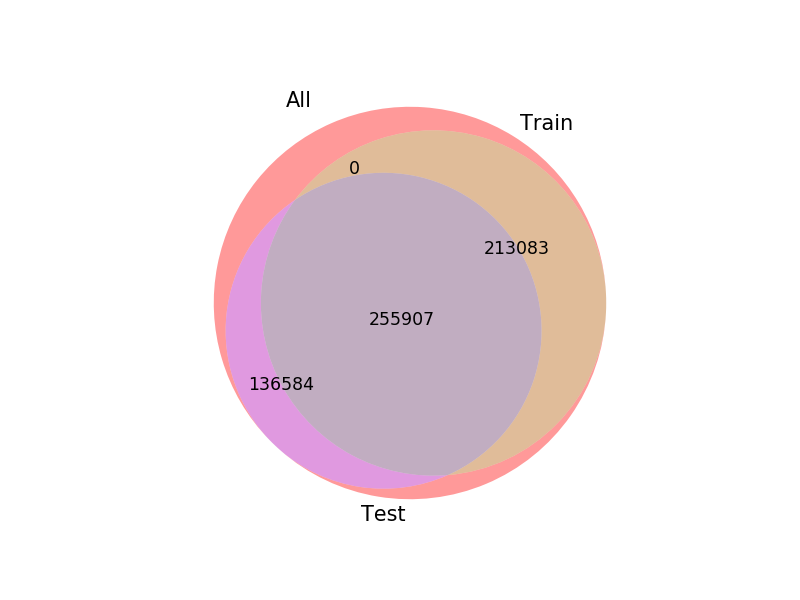

In [1]:
# !pip install editdistance
%matplotlib notebook
import editdistance
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib_venn import venn3
from sklearn.feature_extraction.text import CountVectorizer

train_df = pd.read_csv('../data/proc_train.csv')
pred_df = pd.read_csv('predictions/stack_v1_full.csv')

clean_names = []

# only non-nonsense queries
l1 = list(train_df[train_df.target.isin([0,1])].fullname_true)
# only "clean queries"
l2 = list(pred_df[pred_df.target==0].fullname_true)

clean_names.extend(l1)
clean_names.extend(l2)
print(len(l1),len(l2),len(clean_names))

cv = CountVectorizer(lowercase=False,
                     ngram_range=(1,1),
                     analyzer='word')
cv.fit(clean_names)

vocab = cv.vocabulary_

cv = CountVectorizer(lowercase=False,
                     ngram_range=(1,1),
                     analyzer='word')
cv.fit(l1)

vocab_train = cv.vocabulary_

cv = CountVectorizer(lowercase=False,
                     ngram_range=(1,1),
                     analyzer='word')
cv.fit(l2)

vocab_test = cv.vocabulary_

print(len(vocab),len(vocab_train),len(vocab_test))

venn3([set(vocab.keys()),
       set(vocab_train.keys()),
       set(vocab_test.keys())], ('All', 'Train', 'Test'))

In [2]:
def count_new_words(text):
    global vocab
    new_words = 0
    words = text.split()
    
    for word in words:
        if word not in vocab:
            new_words += 1
            
    return new_words

pred_df['new_words'] = pred_df['fullname_true'].apply(lambda x: count_new_words(x))



In [3]:
cond = (pred_df.target==1)
pred_df[cond].new_words.value_counts()


0    1336744
1     193537
2      13899
3        829
4         11
5          1
Name: new_words, dtype: int64

In [4]:
cond = (pred_df.target==0)
pred_df[cond].new_words.value_counts()

0    1153927
1       6923
2        451
3         21
4          2
Name: new_words, dtype: int64

In [8]:
vocab_list = list(vocab.keys())
cond = (pred_df.target==1)&(pred_df.new_words>0)
vocab_list_len = [len(_) for _ in vocab_list]

vocab_list_len = np.array(vocab_list_len)
vocab_arr = np.array(vocab_list)

phrase = pred_df[cond].sample(n=1).fullname_true.values[0]

words = phrase.split()

print(phrase)

for word in words:
    if word not in vocab:
        print(word)
        similar_vocab = vocab_arr[(vocab_list_len>len(word)-1)*(vocab_list_len<len(word)+1)]
        distances = [editdistance.eval(name,word) for name in similar_vocab]
        idx = np.argsort(np.array(distances))[:5]
        print(similar_vocab[idx[0]],
              similar_vocab[idx[1]],
              similar_vocab[idx[2]],
              similar_vocab[idx[3]])

АЗИМОВ АЗАМХОН НУРИДИНХУЧАЕВИЧ
НУРИДИНХУЧАЕВИЧ
НУРИЛЛОХУЧАЕВИЧ БАФИДИНХУЧАЕВИЧ МУХИДИНХОЖАЕВИЧ ИБРОХИМХУЧАЕВИЧ
